# Final Project - Krisna Sandy Pribadi

## About the Organization
HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

## Root of problem
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

## Our objective
Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

## Datasets

In [568]:
# Importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [569]:
# Datasets feature
data = pd.read_csv('Data_Negara_HELP.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Dataset yang akan diolah terdiri dari 167 baris data negara dan 10 kolom dengan penjelasan sebagai berikut:

- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

## Multivariate analysis

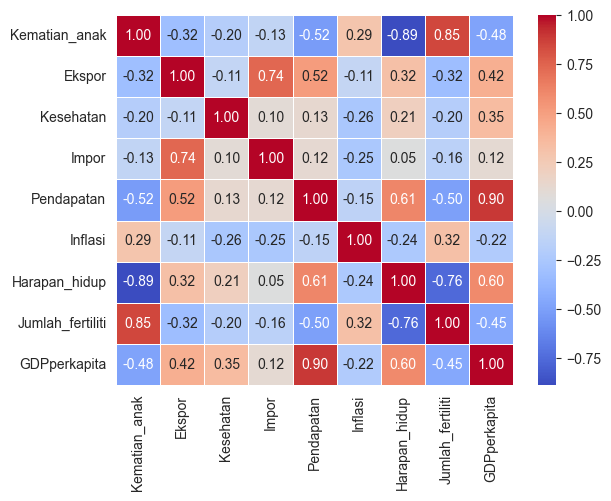

In [570]:
# Set Negara as index
data.set_index('Negara', inplace=True)
# Show correlation matrix
correlation_matrix = data.corr()
# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

Berdasarkan hasil analisis multivariat tersebut kita dapatkan variable dengan nilai korelasi tertinggi adalah sebagai berikut:
- GDPperkapita dengan Pendapatan (0.90)
- Jumlah_fertiliti dengan Kematian_anak (0.85)

Dari data tersebut, variable dengan korelasi yang tinggi merupakan variable yang berada dalam satu kategori, GDPperkapita dan Pendapatan termasuk dalam kategori faktor ekonomi dan Jumlah_fertiliti dan Kematian_anak termasuk dalam faktor kesehatan.
Diputuskan untuk menggunakan 2 variable sebagai dasar analisis dan clustering selanjutnya, yaitu, GPDperkapita dan Kematian_anak.

- GDPperkapita
GDP perkapita merupakan rasio antara pendapatan nasional suatu negara dengan jumlah penduduknya. Semakin tinggi GDP perkapita, maka semakin tinggi tingkat kesejahteraan masyarakat di negara tersebut. GDP perkapita dapat menjadi pertimbangan dalam pemberian bantuan karena dapat memberikan gambaran tentang kondisi ekonomi suatu negara. Negara dengan GDP perkapita yang tinggi biasanya memiliki tingkat kemiskinan yang rendah dan akses yang lebih baik terhadap layanan kesehatan, pendidikan, dan pangan.

- Kematian_anak 
Kematian anak di bawah usia 5 tahun merupakan indikator yang penting untuk mengukur kualitas kesehatan dan kesejahteraan anak-anak di suatu negara. Anak-anak yang meninggal di bawah usia 5 tahun biasanya meninggal karena penyakit yang dapat dicegah atau diobati, seperti diare, pneumonia, dan malaria. Tingginya angka kematian anak di bawah usia 5 tahun menunjukkan bahwa sistem kesehatan di negara tersebut belum memadai atau akses masyarakat terhadap layanan kesehatan masih terbatas.

Dua data ini dipilih karena:

- Keduanya merupakan indikator yang komprehensif dan mencakup berbagai aspek penting dari kesehatan dan ekonomi.
- Keduanya dapat diakses dengan mudah dan akurat.
- Keduanya dapat digunakan untuk membandingkan kesejahteraan berbagai negara.
Berdasarkan dua data ini, pemerintah dapat menentukan apakah suatu negara membutuhkan bantuan atau tidak. Suatu negara yang memiliki angka kematian anak yang tinggi dan GDP per kapita yang rendah kemungkinan besar membutuhkan bantuan untuk meningkatkan kesejahteraan masyarakatnya.

## Data cleaning

In [571]:
# Check if missing value exist
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kematian_anak     167 non-null    float64
 1   Ekspor            167 non-null    float64
 2   Kesehatan         167 non-null    float64
 3   Impor             167 non-null    float64
 4   Pendapatan        167 non-null    int64  
 5   Inflasi           167 non-null    float64
 6   Harapan_hidup     167 non-null    float64
 7   Jumlah_fertiliti  167 non-null    float64
 8   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


Berdasarkan informasi tersebut, tidak terdapat missing value dalam dataset.

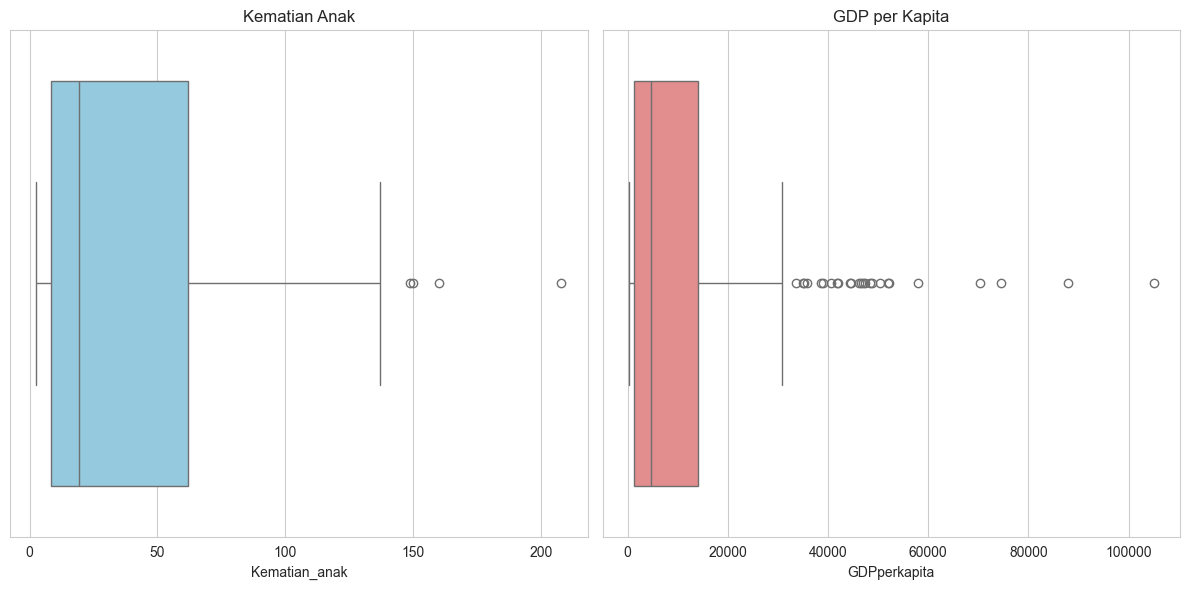

In [572]:
# Checking outliers
# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))

# Boxplot for 'Kematian_anak'
plt.subplot(1, 2, 1)
sns.boxplot(x='Kematian_anak', data=data, color='skyblue')
plt.title('Kematian Anak')

# Boxplot for 'GDPperkapita'
plt.subplot(1, 2, 2)
sns.boxplot(x='GDPperkapita', data=data, color='lightcoral')
plt.title('GDP per Kapita')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data yang dilakukan menggunakan boxplot pada Kematian_anak dan GPDperkapita, dari kedua data tersebut terdapat beberapa outliers.
Beberapa negara memang memiliki jumlah kematian anak yang cukup ekstrim, yang diyakini bukan merupakan kesalahan pengambilan data. Outliers pada GDPperkapita menunjukan bahwa memang beberapa negara maju memiliki GDP yang jauh lebih besar dibandingkan negara lainnya. 
Untuk menangani outliers tersebut, akan dilakukan penggantianan data menggunakan upper dan lower bound. Metode ini dilakukan karena hasil analisis sangat sensitif, yaitu untuk menentukan keputusan pemberian bantuan kepada negara yang membutuhkan. Jika dilakukan penghapusan outliers, dikhawatirkan akan membuat hasil analisis tidak valid.

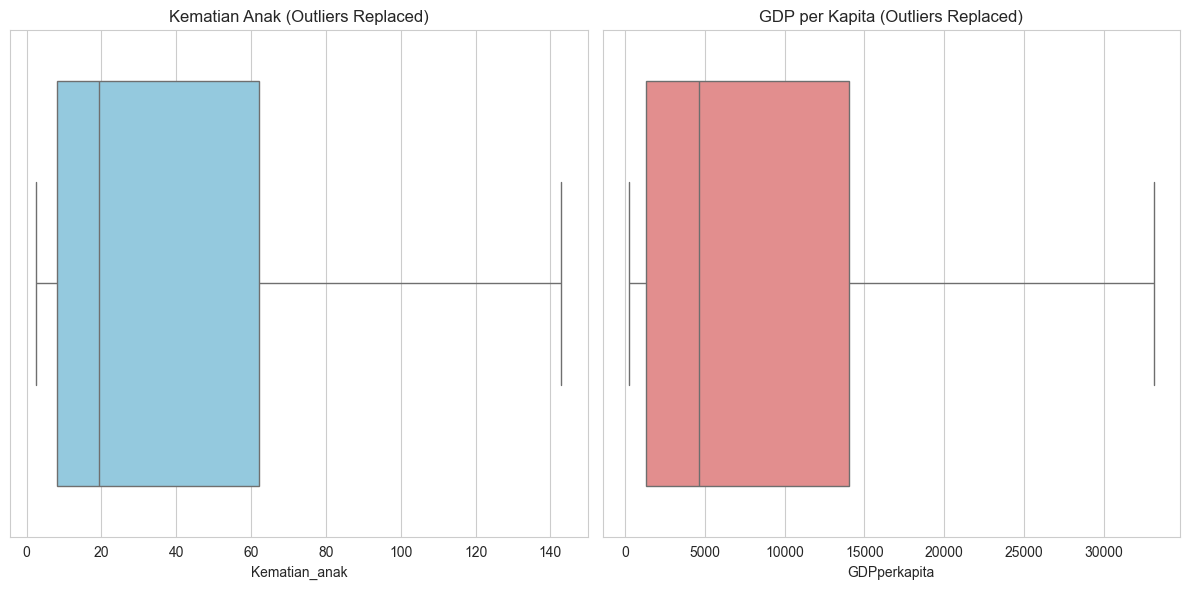

In [573]:
# Set upper and lower bound
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

# Kematian anak
upper_bound_kematian, lower_bound_kematian = find_boundaries(data, 'Kematian_anak', 1.5)
# GDP per kapita
upper_bound_gdp, lower_bound_gdp = find_boundaries(data, 'GDPperkapita', 1.5)

# Changing outliers to upper and lower bound
data['Kematian_anak'] = data['Kematian_anak'].clip(lower=lower_bound_kematian, upper=upper_bound_kematian)
data['GDPperkapita'] = data['GDPperkapita'].clip(lower=lower_bound_gdp, upper=upper_bound_gdp)

plt.figure(figsize=(12, 6))

# Boxplot for 'Kematian_anak' after replacing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='Kematian_anak', data=data, color='skyblue')
plt.title('Kematian Anak (Outliers Replaced)')

# Boxplot for 'GDPperkapita' after replacing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='GDPperkapita', data=data, color='lightcoral')
plt.title('GDP per Kapita (Outliers Replaced)')

plt.tight_layout()
plt.show()



## Univariate Analysis

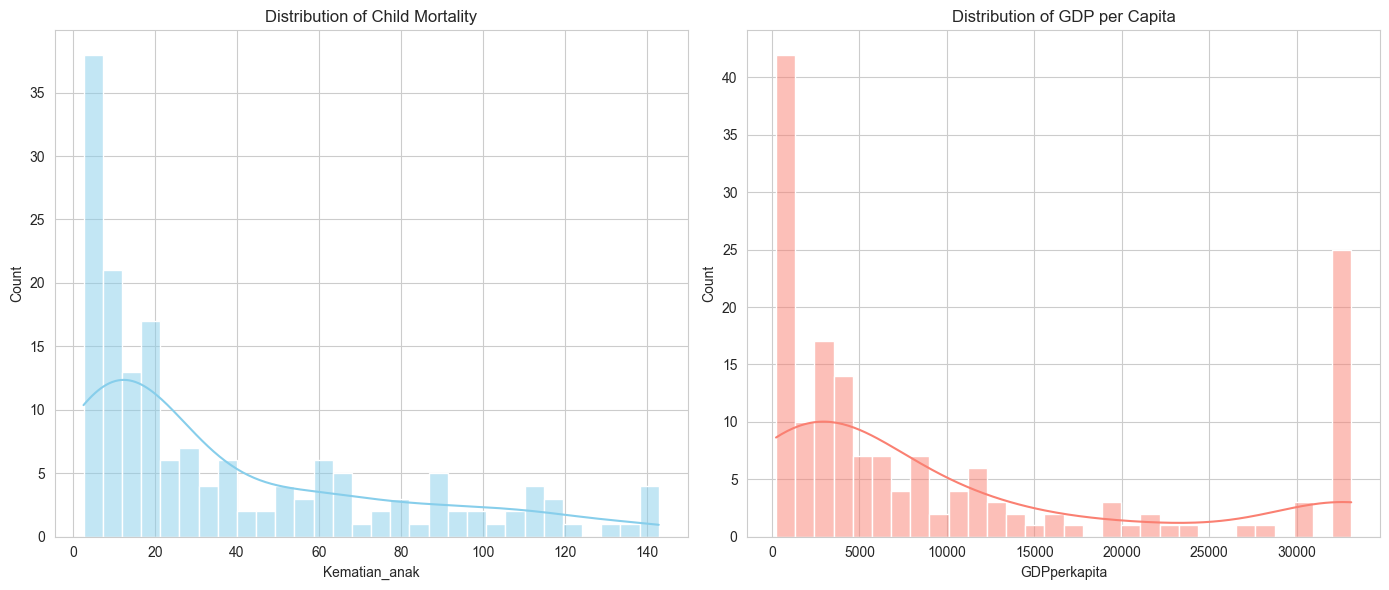

In [574]:
sns.set_style('whitegrid')

# Univariate analysis on 'Kematian_anak'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Kematian_anak'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Child Mortality')

# Univariate analysis on 'GDPperkapita'
plt.subplot(1, 2, 2)
sns.histplot(data['GDPperkapita'], kde=True, color='salmon', bins=30)
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()

- Distribusi Kematian_anak "skewed" ke kanan, yang menunjukkan bahwa meskipun sebagian besar negara memiliki angka kematian anak yang rendah, terdapat banyak negara dengan angka kematian anak yang lebih tinggi. Hal ini menunjukkan bahwa kematian anak merupakan masalah yang signifikan di beberapa negara, yang mungkin disebabkan oleh faktor-faktor seperti sistem layanan kesehatan yang tidak memadai, gizi buruk, atau faktor sosio-ekonomi lainnya.

- Distribusi PDB per kapita juga "skewed" ke kanan, yang menunjukkan bahwa sebagian besar negara mempunyai PDB per kapita yang relatif rendah, dan hanya sedikit negara yang mempunyai PDB per kapita yang jauh lebih tinggi. Hal ini mencerminkan kesenjangan ekonomi antar negara, dengan sejumlah kecil negara yang memiliki kekayaan per kapita jauh lebih tinggi dibandingkan negara lain.

## Bivariate analysis

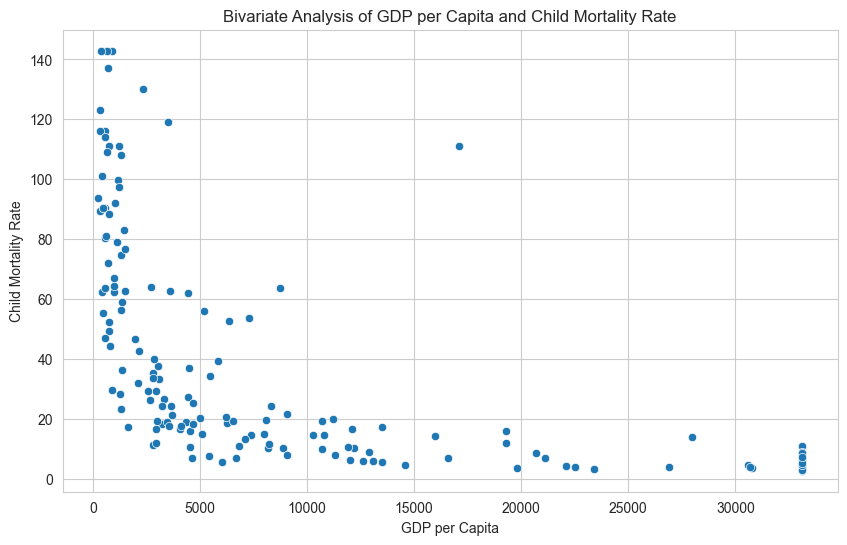

In [575]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', data=data)
plt.title('Bivariate Analysis of GDP per Capita and Child Mortality Rate')
plt.xlabel('GDP per Capita')
plt.ylabel('Child Mortality Rate')
plt.show()

Analisis bivariat PDB per Kapita (PDBperkapita) dan Angka Kematian Anak (Kematian_anak) menunjukkan adanya korelasi negatif antara kedua variabel. Ketika PDB per kapita meningkat, angka kematian anak cenderung menurun. Hal ini menunjukkan bahwa tingkat pendapatan yang lebih tinggi di suatu negara berkaitan dengan tingkat kesehatan anak yang lebih baik, kemungkinan besar disebabkan oleh peningkatan layanan kesehatan, nutrisi, dan kondisi lingkungan.

## Clustering

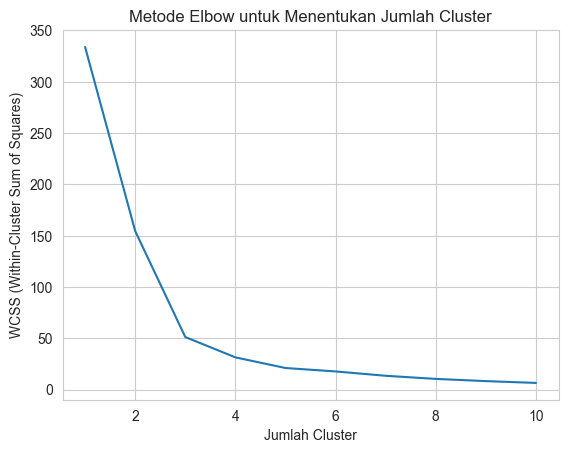

In [576]:
selected_features = ['Kematian_anak', 'GDPperkapita']
subset_data = data[selected_features]

# Data scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Decide the number of clusters using Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


Berdasarkan hasil scaling data tersebut, ditentukan cluster yang optimal diantara 2, 3, atau 4. Pada analisis kali ini saya memilih menggunakan 4 cluster agar dapat melihat data lebih jelas

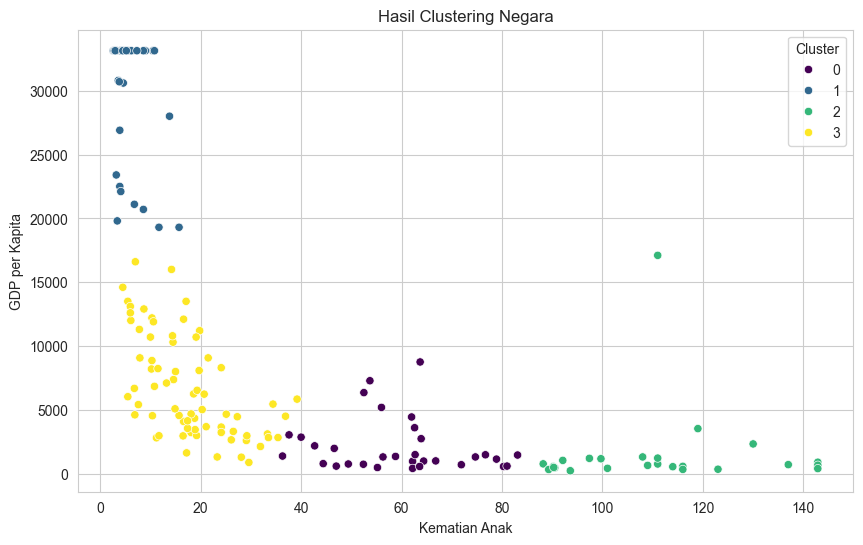

In [577]:
# Set optimal number of clusters
optimal_clusters = 4

# Clustering using KMeans
kmeans = KMeans(n_clusters=optimal_clusters, n_init='auto', init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Visualisasi clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kematian_anak', y='GDPperkapita', hue='Cluster', data=data, palette='viridis')
plt.title('Hasil Clustering Negara')
plt.xlabel('Kematian Anak')
plt.ylabel('GDP per Kapita')
plt.show()

## Recommendation

Berdasarkan hasil clustering tersebut, dapat dilihat bahwa negara yang berada pada cluster warna hijau, yaitu cluster 2, memiliki angka kematian anak yang tinggi dan GDP per kapita yang rendah.

In [578]:
# Show Country from cluster 2
cluster_2 = data[data['Cluster']==2]
display(cluster_2)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
Negara,,,,,,,,,,
Afghanistan,90.200,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
Angola,119.000,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
Benin,111.000,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
Burkina Faso,116.000,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
Burundi,93.600,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
Cameroon,108.000,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
Central African Republic,142.875,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
Chad,142.875,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
Comoros,88.200,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2


In [579]:
# Recommend 5 country to receive help
selected_column = ['Kematian_anak', 'GDPperkapita', 'Harapan_hidup']
top_5 = cluster_2.sort_values(by=selected_column, ascending=[False,True,True]).head(5)
display(top_5[selected_column])

,Kematian_anak,GDPperkapita,Harapan_hidup
Negara,,,
Sierra Leone,142.875,399,55.0
Central African Republic,142.875,446,47.5
Haiti,142.875,662,32.1
Chad,142.875,897,56.5
Mali,137.000,708,59.5


Saya hanya merekomendasikan 5 negara dikarenakan angka US$ 10.000.000 merupakan angka yang tidak banyak untuk membantu sebuah negara. Dengan mengerucutkan menjadi 5 penerima bantuan diharapkan bantuan tersebut mencukupi dan dapat dimaksimalkan penggunaanya.
Kelima negara tersebut direkomendasikan untuk menjadi prioritas penerima bantuan dengan alasan berikut:
- Tingkat Kematian Anak: Tingkat kematian anak yang tinggi menunjukkan adanya masalah serius dalam sistem kesehatan dan sanitasi negara tersebut. Bantuan dapat digunakan untuk meningkatkan infrastruktur kesehatan, memberikan akses ke layanan kesehatan yang lebih baik, dan mengurangi faktor-faktor risiko kematian anak.

- GDP per Kapita: Pendapatan per kapita yang rendah menandakan bahwa penduduk di negara tersebut mungkin menghadapi kesulitan ekonomi dan kehidupan yang sulit. Bantuan dapat digunakan untuk meningkatkan keberlanjutan ekonomi, memberikan pelatihan keterampilan, dan mengembangkan sektor-sektor ekonomi yang berpotensi.

Saya menambahkan satu kriteria lagi yang dapat membantu untuk menentukan prioritas, yaitu angka harapan hidup.

- Harapan Hidup: Harapan hidup yang rendah mencerminkan adanya tantangan kesehatan dan lingkungan hidup yang serius. Bantuan dapat digunakan untuk meningkatkan sistem kesehatan, menyediakan air bersih, sanitasi, dan pendidikan kesehatan kepada masyarakat.